In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('player.csv').set_index('player_id')
df

,names,born,bat_type,bowl_type,height,matches,country
player_id,,,,,,,
1138308,Methsith Jayamanna,date unknown,0,0,0,2,Sri Lanka
379879,Ayavuya Myoli,"June 8, 1990, King William's Town, Cape Province",Right-hand bat,Right-arm fast,0,23,South Africa
47146,Brendon Leigh Reddy,"November 6, 1983, Durban, Natal",Right-hand bat,Right-arm fast-medium,0,18,South Africa
1046613,Daniel Weston,11-Mar-83,0,0,0,0,Germany
928073,William McClintock,"January 1, 1997, Ireland",Right-hand bat,Right-arm medium,0,2,Ireland
...,...,...,...,...,...,...,...
820393,Sumit Kumar,"December 30, 1995, Bokaro, Bihar",Right-hand bat,0,0,12,India
714503,Bhavesh Gulecha,21-Jan-93,Right-hand bat,Right-arm medium-fast,0,0,India
789729,Callum Francis Parkinson,"October 24, 1996, Bolton, Lancashire",Right-hand bat,Slow left-arm orthodox,0,15,England


In [5]:
df = df.drop(columns= ['born', 'height'], axis= 1)
df.drop_duplicates()
df.dropna()
df

,names,bat_type,bowl_type,matches,country
player_id,,,,,
1138308,Methsith Jayamanna,0,0,2,Sri Lanka
379879,Ayavuya Myoli,Right-hand bat,Right-arm fast,23,South Africa
47146,Brendon Leigh Reddy,Right-hand bat,Right-arm fast-medium,18,South Africa
1046613,Daniel Weston,0,0,0,Germany
928073,William McClintock,Right-hand bat,Right-arm medium,2,Ireland
...,...,...,...,...,...
820393,Sumit Kumar,Right-hand bat,0,12,India
714503,Bhavesh Gulecha,Right-hand bat,Right-arm medium-fast,0,India
789729,Callum Francis Parkinson,Right-hand bat,Slow left-arm orthodox,15,England


In [6]:
df = df.rename({'names': 'Full Name', 'bat_type': 'Bat Hand',
                'bowl_type': 'Bowl Hand', 'matches': 'Matches Played',
                'country': 'Country'}, axis= 1)
df

,Full Name,Bat Hand,Bowl Hand,Matches Played,Country
player_id,,,,,
1138308,Methsith Jayamanna,0,0,2,Sri Lanka
379879,Ayavuya Myoli,Right-hand bat,Right-arm fast,23,South Africa
47146,Brendon Leigh Reddy,Right-hand bat,Right-arm fast-medium,18,South Africa
1046613,Daniel Weston,0,0,0,Germany
928073,William McClintock,Right-hand bat,Right-arm medium,2,Ireland
...,...,...,...,...,...
820393,Sumit Kumar,Right-hand bat,0,12,India
714503,Bhavesh Gulecha,Right-hand bat,Right-arm medium-fast,0,India
789729,Callum Francis Parkinson,Right-hand bat,Slow left-arm orthodox,15,England


In [7]:
df['Bowl Hand Speed'] = df['Bowl Hand'].str.split(pat= ' ').str[1]
df['Bowl Hand Speed'] = df['Bowl Hand Speed'].replace({'Data': np.nan})
df

,Full Name,Bat Hand,Bowl Hand,Matches Played,Country,Bowl Hand Speed
player_id,,,,,,
1138308,Methsith Jayamanna,0,0,2,Sri Lanka,NaN
379879,Ayavuya Myoli,Right-hand bat,Right-arm fast,23,South Africa,fast
47146,Brendon Leigh Reddy,Right-hand bat,Right-arm fast-medium,18,South Africa,fast-medium
1046613,Daniel Weston,0,0,0,Germany,NaN
928073,William McClintock,Right-hand bat,Right-arm medium,2,Ireland,medium
...,...,...,...,...,...,...
820393,Sumit Kumar,Right-hand bat,0,12,India,NaN
714503,Bhavesh Gulecha,Right-hand bat,Right-arm medium-fast,0,India,medium-fast
789729,Callum Francis Parkinson,Right-hand bat,Slow left-arm orthodox,15,England,left-arm


In [8]:
df['Bat Hand'] = df['Bat Hand'].str.split(pat= ' ').str[0]
df['Bat Hand'] = df['Bat Hand'].str.split(pat= '-').str[0]
df['Bowl Hand'] = df['Bowl Hand'].replace({'Slow left-arm orthodox': 'Left'})
df['Bowl Hand'] = df['Bowl Hand'].str.split(pat= ' ').str[0]
df['Bowl Hand'] = df['Bowl Hand'].str.split(pat= '-').str[0]
df

,Full Name,Bat Hand,Bowl Hand,Matches Played,Country,Bowl Hand Speed
player_id,,,,,,
1138308,Methsith Jayamanna,0,0,2,Sri Lanka,NaN
379879,Ayavuya Myoli,Right,Right,23,South Africa,fast
47146,Brendon Leigh Reddy,Right,Right,18,South Africa,fast-medium
1046613,Daniel Weston,0,0,0,Germany,NaN
928073,William McClintock,Right,Right,2,Ireland,medium
...,...,...,...,...,...,...
820393,Sumit Kumar,Right,0,12,India,NaN
714503,Bhavesh Gulecha,Right,Right,0,India,medium-fast
789729,Callum Francis Parkinson,Right,Left,15,England,left-arm


In [9]:
df['Bat Hand'] = df['Bat Hand'].replace({'0': np.nan})
df['Bowl Hand'] = df['Bowl Hand'].replace({'0': np.nan})
df['Bowl Hand'] = df['Bowl Hand'].replace({'Slow': np.nan})
df['Bowl Hand'] = df['Bowl Hand'].replace({'Legbreak': np.nan})
df = df.dropna()
df

,Full Name,Bat Hand,Bowl Hand,Matches Played,Country,Bowl Hand Speed
player_id,,,,,,
379879,Ayavuya Myoli,Right,Right,23,South Africa,fast
47146,Brendon Leigh Reddy,Right,Right,18,South Africa,fast-medium
928073,William McClintock,Right,Right,2,Ireland,medium
596540,Matthew Colin Christensen,Right,Right,13,South Africa,offbreak
465783,Muthuthanthrige Vishwa Thilina Fernando,Right,Left,9,Sri Lanka,medium-fast
...,...,...,...,...,...,...
303508,Shane Charles Getkate,Right,Right,6,Ireland,medium-fast
227455,SK Robiul Islam,Right,Right,6,Bangladesh,fast-medium
714503,Bhavesh Gulecha,Right,Right,0,India,medium-fast


In [10]:
df.dtypes

Full Name          object
Bat Hand           object
Bowl Hand          object
Matches Played      int64
Country            object
Bowl Hand Speed    object
dtype: object

In [11]:
plt.style.use('dark_background')

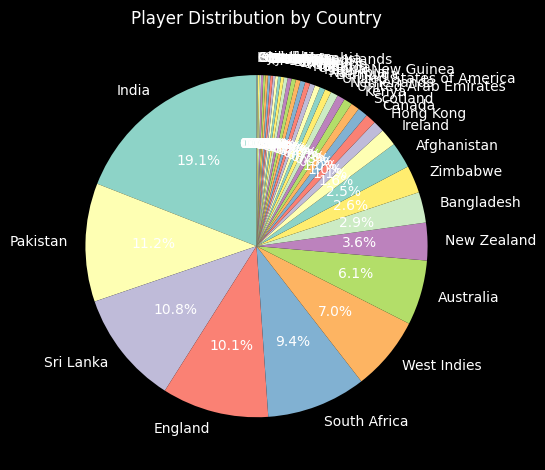

In [12]:
Country_count = df['Country'].value_counts()

plt.pie(Country_count.values, labels= Country_count.index,
        autopct= '%0.1f%%', startangle= 90)
plt.title('Player Distribution by Country')
plt.tight_layout()

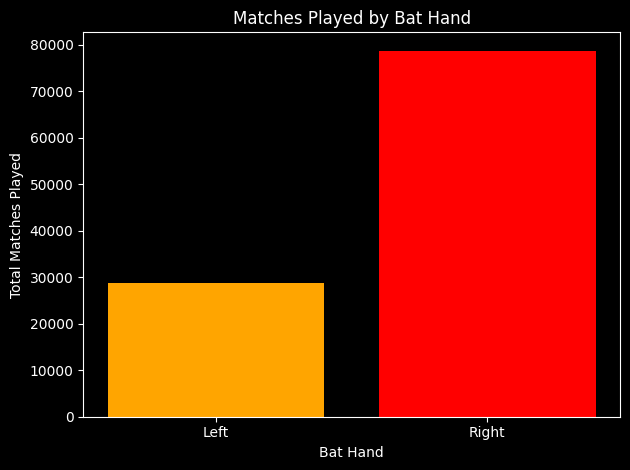

In [18]:
Bat_Hand_Matches = df.groupby('Bat Hand')['Matches Played'].sum()

plt.bar(Bat_Hand_Matches.index, Bat_Hand_Matches.values, color = ['orange', 'red'])
plt.title('Matches Played by Bat Hand')
plt.xlabel('Bat Hand')
plt.ylabel('Total Matches Played')
plt.tight_layout()

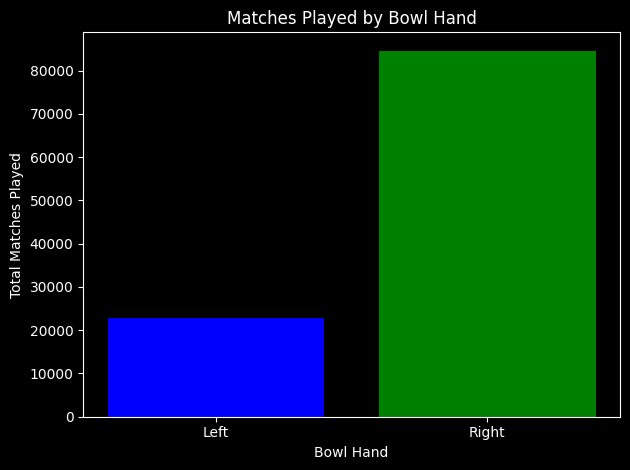

In [14]:
Bowl_Hand_Matches = df.groupby('Bowl Hand')['Matches Played'].sum()

plt.bar(Bowl_Hand_Matches.index, Bowl_Hand_Matches.values, color = ['blue', 'green'])
plt.title('Matches Played by Bowl Hand')
plt.xlabel('Bowl Hand')
plt.ylabel('Total Matches Played')
plt.tight_layout()

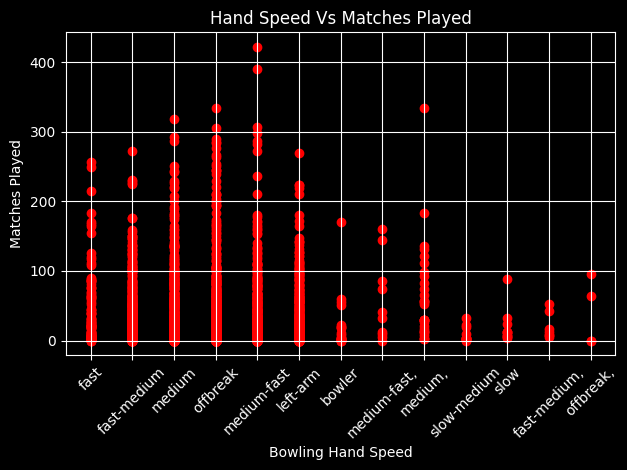

In [15]:
plt.scatter(df['Bowl Hand Speed'], df['Matches Played'],
            color= 'red')
plt.title('Hand Speed Vs Matches Played')
plt.xlabel('Bowling Hand Speed')
plt.ylabel('Matches Played')
plt.xticks(rotation= 45)
plt.grid(True)
plt.tight_layout()

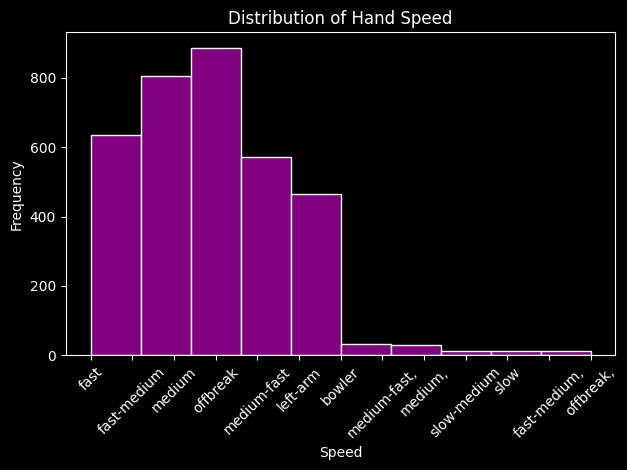

In [16]:
plt.hist(df['Bowl Hand Speed'], bins= 10, color= 'purple', edgecolor= 'white')
plt.title('Distribution of Hand Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.xticks(rotation= 45)
plt.tight_layout()

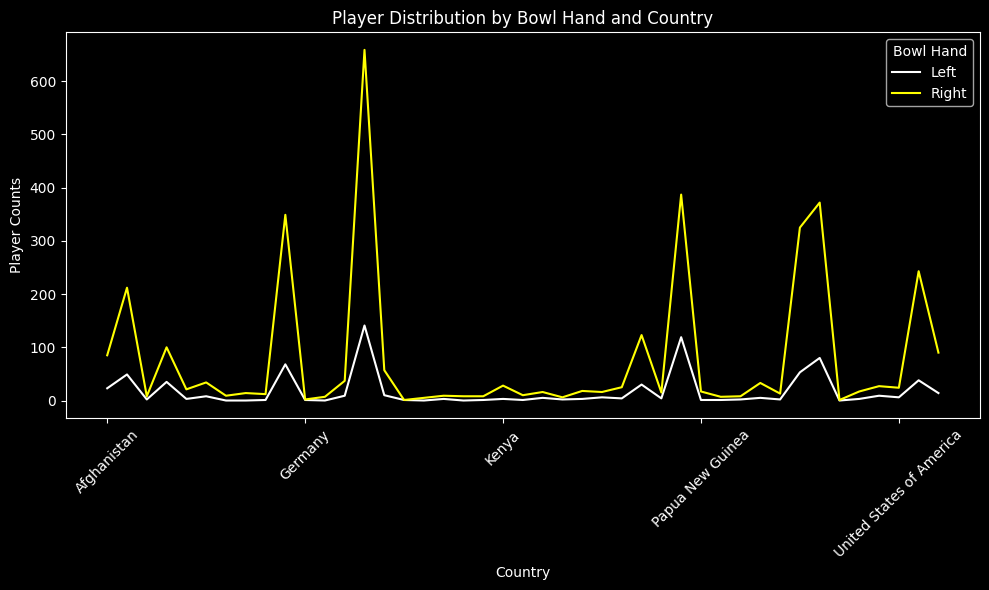

In [17]:
Bowl_Country = df.groupby(['Country', 'Bowl Hand']).size().unstack(fill_value= 0)

Bowl_Country.plot(kind= 'line', stacked= True, figsize= (10, 6),
                  color= ['white', 'yellow'])
plt.title('Player Distribution by Bowl Hand and Country')
plt.xlabel('Country')
plt.ylabel('Player Counts')
plt.xticks(rotation= 45)
plt.tight_layout()